# A Quick Guide to Deep Learning with Python

Kai Zhang, Duke Kunshan University, 2022

# Lecture 3 Multiclass Classification (Digit Recognition with Softmax Regression)

MNIST dataset
http://yann.lecun.com/exdb/mnist/




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
train_labels

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

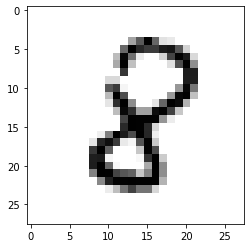

In [ ]:
digit = 32000
plt.imshow(train_images[digit], cmap = matplotlib.cm.binary)

In [ ]:
print(train_images[digit])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  92 166 253 153  29
   22   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 151 253 214 196 196 228
  234 169  44   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  67 246 143  19   0   0  44
  187 252 228  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  85 252  63   0   0   0   0
   32 177 252 113   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 201   0   0   

# Multiclass classification with softmax regression

If there are $K>2$ classes, let input matrix of $m$ samples and $n$ features (excluding bias term $x_0=1$)
\begin{equation}
{\bf X} = 
\begin{bmatrix}
1 & x_{11}& x_{12}& \cdots & x_{1n}\\
1& x_{21}& x_{22}& \cdots& x_{2n}\\
\vdots & \vdots & \vdots & \ddots & \cdots\\
1& x_{m1}& x_{m2}& \cdots& x_{mn}
\end{bmatrix}_{m \times (n+1)}
= 
\begin{bmatrix}
-{\bf x}_1^T-\\
-{\bf x}_2^T-\\
\vdots\\
-{\bf x}_m^T-
\end{bmatrix} =
\begin{bmatrix}
| & | & | & |\\
{\bf x}_{:,0} & {\bf x}_{:,1} & \cdots &  {\bf x}_{:,n}\\
| & | & | & |
\end{bmatrix}
\end{equation}
and the weight matrix
\begin{equation}
{\bf W} =
\begin{bmatrix}
w_{10} & w_{11}& w_{12}& \cdots & w_{1n}\\
w_{20}& w_{21}& w_{22}& \cdots& w_{2n}\\
\vdots & \vdots & \vdots & \ddots & \cdots\\
w_{K0}& w_{K1}& w_{K2}& \cdots& w_{Kn}
\end{bmatrix}_{K \times (n+1)}
=
\begin{bmatrix}
-{\bf w}_1^T-\\
-{\bf w}_2^T-\\
\vdots\\
-{\bf w}_K^T-
\end{bmatrix}
\end{equation}
then the logit vector or softmax score for each sample
\begin{equation}
{\bf z} = 
\begin{bmatrix}
z_1\\
z_2\\
\vdots\\
z_K
\end{bmatrix} = 
{\bf W} \cdot {\bf x}
\end{equation}
or 
\begin{equation}
z_k = {\bf w}_k^T \cdot {\bf x}, ~~~ k = 1,2,\cdots,K
\end{equation}
and 
\begin{equation}
{\bf Z}_{m \times K} = 
{\bf X} \cdot {\bf W}^T =
\begin{bmatrix}
-{\bf z}_1^T-\\
-{\bf z}_2^T-\\
\vdots\\
-{\bf z}_m^T-
\end{bmatrix}
\end{equation}



**softmax function**

\begin{equation}
\hat{p}_k = \frac{\exp(z_k) }{\sum\limits_{j=1}^K \exp(z_j)} = s(z_k)
\end{equation}
Note that $\hat{p}_k = s(z_k)$ depends on all the other $z_j \ne z_k$ as well.

softmax classifier prediction
\begin{equation}
\hat{y} = {\rm arg}\max\limits_{k} \hat{p}_k =   {\rm arg}\max\limits_{k} z_k({\bf x})
\end{equation}


cross entropy loss function
\begin{equation}
J({\bf W}) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_{ik} \log \hat{p}_{ik} = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_{ik} \log s(z_{ik})
\end{equation}
where $z_{ik} = {\bf w}_k^T \cdot {\bf x}_i = \sum\limits_{j=1}^{n+1} w_{kj} x_{ij}$.
 
gradient vector for class $k$
\begin{equation}
\left(\nabla_{{\bf w}_k} J({\bf W}) \right)_{(n+1) \times 1} = \frac{1}{m} \sum_{i=1}^m \left( \hat{p}_{ik} - y_{ik} \right){\bf x}_i 
=\frac{1}{m} \sum_{i=1}^m  \Delta y_{ik} {\bf x}_i =  \frac{1}{m}  {\bf X}^T \cdot \Delta {\bf y}_{:, k}
\end{equation}

**Proof**:
\begin{equation}
\frac{\partial J}{\partial w_{kj}} = \frac{1}{m} \sum_{i=1}^m  \frac{\partial }{\partial z_{ik}} \left[- \sum_{\mu=1}^K y_{i\mu} \log \hat{p}_{i\mu} \right] \frac{\partial z_{ik}}{\partial w_{kj}} =     \frac{1}{m} \sum_{i=1}^m  \frac{\partial }{\partial z_{ik}} \left[- \sum_{\mu=1}^K y_{i\mu} \log \hat{p}_{i\mu} \right]   x_{ij}
\end{equation}

\begin{equation}
\begin{aligned}
\frac{\partial }{\partial z_{ik}} \left[- \sum_{\mu=1}^K y_{i\mu} \log \hat{p}_{i\mu} \right] & =  -y_{i k}  \frac{\partial }{\partial z_{ik}} \log \hat{p}_{ik} -  \sum_{\mu\ne k}^K y_{i\mu} \frac{\partial }{\partial z_{ik}} \log \hat{p}_{i\mu}   \\
&=   -y_{i k}  \frac{1}{\hat{p}_{ik}} \frac{\partial \hat{p}_{ik} }{\partial z_{ik}}  -  \sum_{\mu\ne k}^K y_{i\mu}  \frac{1}{\hat{p}_{i\mu}} \frac{\partial \hat{p}_{i\mu} }{\partial z_{ik}}  =  -y_{i k}  \frac{1}{\hat{p}_{ik}}  \hat{p}_{ik}  (1-\hat{p}_{ik} ) -  \sum_{\mu\ne k}^K y_{i\mu}  \frac{1}{\hat{p}_{i\mu}} (-\hat{p}_{i\mu} \hat{p}_{ik} )  \\
& =  -y_{i k} + y_{i k}\hat{p}_{ik} + \hat{p}_{ik}\sum_{\mu\ne k}^K y_{i\mu} = -y_{i k} + \hat{p}_{ik}
\end{aligned}
\end{equation}

In matrix form, let
\begin{equation}
\hat{\bf P}_{m \times K} = 
\begin{bmatrix}
-\hat{\bf p}_1^T-\\
-\hat{\bf p}_2^T-\\
\vdots\\
-\hat{\bf p}_m^T-
\end{bmatrix}
~~~{\rm and}~~~
{\bf Y}_{m \times K} = 
\begin{bmatrix}
-{\bf y}_1^T-\\
-{\bf y}_2^T-\\
\vdots\\
-{\bf y}_m^T-
\end{bmatrix}
\end{equation}
with one-hot vector ${\bf y}_i$ for each sample $i$. 
\begin{equation}
J({\bf W}) =  - {\rm sum} ( {\bf Y}* \log \hat{\bf P} ) /m
\end{equation}
where $*$ means element-wise multiplication and "sum" means to sum over both axes of the matrix.

Gradient tensor
\begin{equation}
\nabla_{{\bf W}} J({\bf W}) =
\begin{bmatrix}
-\nabla_{{\bf w}_1} J({\bf W})^T-\\
-\nabla_{{\bf w}_2} J({\bf W})^T-\\
\vdots \\
-\nabla_{{\bf w}_K} J({\bf W})^T-\\
\end{bmatrix}_{K \times (n+1)}
= \frac{1}{m}  \Delta {\bf Y}^T_{K\times m} \cdot {\bf X}_{m\times(n+1)}
=\frac{1}{m}
\begin{bmatrix}
-\Delta{\bf y}_{:,1}^T-\\
-\Delta{\bf y}_{:,2}^T-\\
\vdots\\
-\Delta{\bf y}_{:,K}^T-
\end{bmatrix}\cdot 
\begin{bmatrix}
| & | & | & |\\
{\bf x}_{:,0} & {\bf x}_{:,1} & \cdots &  {\bf x}_{:,n}\\
| & | & | & |
\end{bmatrix}
\end{equation}
where 
\begin{equation}
 \Delta {\bf Y}_{m \times K} = \hat{\bf P}_{m \times K} -  {\bf Y}_{m \times K} =
\begin{bmatrix}
-\Delta{\bf y}_1^T-\\
-\Delta{\bf y}_2^T-\\
\vdots\\
-\Delta{\bf y}_m^T-
\end{bmatrix}
\end{equation}

# Multiclass classification via sklearn 


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_images.reshape(60000, 28*28).astype(np.float64))
y_train = train_labels


In [ ]:
X_test = scaler.transform(test_images.reshape(10000, 28*28).astype(np.float64)) # do not fit
y_test = test_labels


In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10,random_state=42)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [ ]:
model.score(X_test, y_test)

0.9231

In [ ]:
X_test[[250]].shape

(1, 784)

In [ ]:
model.predict_proba(X_test[[250]])

array([[4.46310768e-13, 2.31233686e-09, 1.24917512e-08, 2.69623015e-06,
        9.71940174e-01, 6.34942540e-07, 5.98075057e-09, 1.76739230e-06,
        5.90810586e-05, 2.79956261e-02]])

In [ ]:
model.predict(X_test[[250]])

array([4], dtype=uint8)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
p_pred = model.predict_proba(X_test)
p_pred.shape

(10000, 10)

In [ ]:
conf_mx = confusion_matrix(y_test, y_pred)

In [ ]:
conf_mx

array([[ 952,    0,    2,    2,    2,   11,    6,    2,    3,    0],
       [   0, 1111,    6,    2,    0,    1,    3,    1,   11,    0],
       [  10,   12,  915,   19,   10,    6,   12,    8,   36,    4],
       [   3,    1,   20,  922,    3,   22,    2,   12,   17,    8],
       [   1,    3,    8,    3,  914,    1,    8,    6,    6,   32],
       [   9,    6,    4,   31,    9,  776,   14,    8,   31,    4],
       [   8,    4,    7,    4,    5,   17,  909,    1,    3,    0],
       [   2,    9,   22,    7,    5,    2,    0,  948,    3,   30],
       [   9,   11,    5,   23,    7,   25,    8,   12,  860,   14],
       [   6,    7,    3,    9,   20,    7,    0,   24,    9,  924]])

from left to right, predicted 0, 1, ..., 9

from top to bottom, actual 0, 1, ..., 9

In [ ]:
column_sums = conf_mx.sum(axis=0, keepdims=True)
column_sums

array([[1000, 1164,  992, 1022,  975,  868,  962, 1022,  979, 1016]])

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[ 980],
       [1135],
       [1032],
       [1010],
       [ 982],
       [ 892],
       [ 958],
       [1028],
       [ 974],
       [1009]])

In [ ]:
true_count = np.trace(conf_mx)
print('accuracy = %d/%d = %lf' % (true_count, len(y_test), true_count/len(y_test)) )

accuracy = 9231/10000 = 0.923100


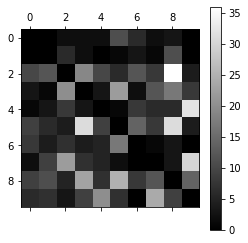

In [ ]:
np.fill_diagonal(conf_mx, 0)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.colorbar()

In [ ]:
#conf_mx_norm = conf_mx / row_sums
#np.fill_diagonal(conf_mx_norm, 0)
#plt.matshow(conf_mx_norm, cmap=plt.cm.gray)

# Model selection via cross validation

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [ ]:
model = SGDClassifier(random_state=42)

In [ ]:
cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [ ]:
model.fit(X_train, y_train)

SGDClassifier(random_state=42)

# Model visualization

binary classification with logistic regression

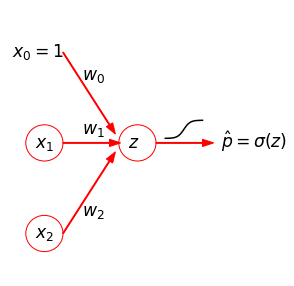

In [ ]:
from matplotlib.pyplot import text

fig, ax = plt.subplots(figsize=(5,5))

circle1 = plt.Circle((1, 0.5), 0.2, edgecolor='r', facecolor = 'none')
circle2 = plt.Circle((1, 1.5), 0.2, edgecolor='r', facecolor = 'none')
circle3 = plt.Circle((2, 1.5), 0.2, edgecolor='r', facecolor = 'none')
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

text(0.65,2.45,'$x_0=1$',size='xx-large')
text(0.9,1.45,'$x_1$',size='xx-large')
text(0.9,0.45,'$x_2$',size='xx-large')
text(1.9,1.45,'$z$',size='xx-large')
text(2.9,1.45,'$\hat{p}=\sigma(z)$',size='xx-large')
text(1.4,2.2,'$w_0$',size='xx-large')
text(1.4,1.6,'$w_1$',size='xx-large')
text(1.4,0.7,'$w_2$',size='xx-large')
plt.arrow(1.2, 2.5, 0.5, -0.8, width = 0.01,head_width = 0.08,color = 'r')
plt.arrow(1.2, 0.5, 0.5, 0.8, width = 0.01,head_width = 0.08,color = 'r')
plt.arrow(1.2, 1.5, 0.5, 0, width = 0.01,head_width = 0.08,color = 'r')
plt.arrow(2.2, 1.5, 0.5, 0, width = 0.01,head_width = 0.08,color = 'r')
t=np.linspace(2.3,2.7,100)
plt.plot(t, 0.2/(1.0+np.exp(-30*(t-2.5)))+1.55,'k-')
plt.axis([0.6,3.6,0,3])
ax.set_axis_off()

multiclass classfication with softmax regression

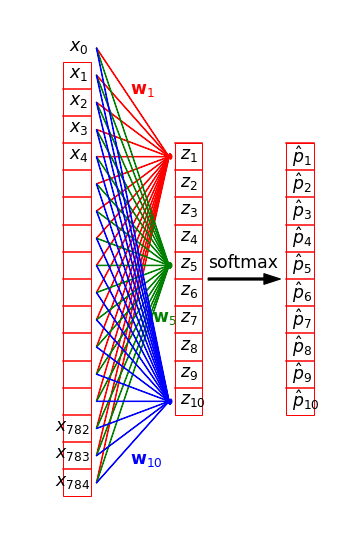

In [ ]:
fig, ax = plt.subplots(figsize=(6,10))
rectangle1 = plt.Rectangle((0.5,0.5), 0.25, 4, fc='none',ec="red")
ax.add_patch(rectangle1)
for i in range(15):
  plt.plot([0.5,0.75],[0.25*i+0.75,0.25*i+0.75], 'r-')

rectangle2 = plt.Rectangle((1.5,1.25), 0.25, 2.5, fc='none',ec="red")
ax.add_patch(rectangle2)
for i in range(10):
  plt.plot([1.5,1.75],[0.25*i+1.5,0.25*i+1.5], 'r-')


rectangle3 = plt.Rectangle((2.5,1.25), 0.25, 2.5, fc='none',ec="red")
ax.add_patch(rectangle3)
for i in range(10):
  plt.plot([2.5,2.75],[0.25*i+1.5,0.25*i+1.5], 'r-')

text(0.55,4.5+0.1,'$x_0$',size='xx-large')
text(0.55,4.25+0.1,'$x_1$',size='xx-large')
text(0.55,4.0+0.1,'$x_2$',size='xx-large')
text(0.55,3.75+0.1,'$x_3$',size='xx-large')
text(0.55,3.5+0.1,'$x_4$',size='xx-large')

text(1.55,3.5+0.1,'$z_1$',size='xx-large')
text(1.55,3.25+0.1,'$z_2$',size='xx-large')
text(1.55,3.+0.1,'$z_3$',size='xx-large')
text(1.55,2.75+0.1,'$z_4$',size='xx-large')
text(1.55,2.5+0.1,'$z_5$',size='xx-large')
text(1.55,2.25+0.1,'$z_6$',size='xx-large')
text(1.55,2.+0.1,'$z_7$',size='xx-large')
text(1.55,1.75+0.1,'$z_8$',size='xx-large')
text(1.55,1.5+0.1,'$z_9$',size='xx-large')
text(1.55,1.25+0.1,'$z_{10}$',size='xx-large')

text(2.55,3.5+0.07,'$\hat{p}_1$',size='xx-large')
text(2.55,3.25+0.07,'$\hat{p}_2$',size='xx-large')
text(2.55,3.+0.07,'$\hat{p}_3$',size='xx-large')
text(2.55,2.75+0.07,'$\hat{p}_4$',size='xx-large')
text(2.55,2.5+0.07,'$\hat{p}_5$',size='xx-large')
text(2.55,2.25+0.07,'$\hat{p}_6$',size='xx-large')
text(2.55,2.+0.07,'$\hat{p}_7$',size='xx-large')
text(2.55,1.75+0.07,'$\hat{p}_8$',size='xx-large')
text(2.55,1.5+0.07,'$\hat{p}_9$',size='xx-large')
text(2.55,1.25+0.07,'$\hat{p}_{10}$',size='xx-large')

text(0.43,1.0+0.1,'$x_{782}$',size='xx-large')
text(0.43,0.75+0.1,'$x_{783}$',size='xx-large')
text(0.43,0.5+0.1,'$x_{784}$',size='xx-large')


for i in range(17):
  plt.arrow(0.8, i*0.25+0.625, 0.65, 3.5+0.125-i*0.25-0.625+0.00*i, width = 0.005,head_width = 0.02,color = 'r')
  plt.arrow(0.8, i*0.25+0.625, 0.65, 2.5+0.125-i*0.25-0.625+0.00*i, width = 0.005,head_width = 0.02,color = 'g')
  plt.arrow(0.8, i*0.25+0.625, 0.65, 1.25+0.125-i*0.25-0.625+0.00*i, width = 0.005,head_width = 0.02,color = 'b')

text(1.1,4.2,r'${\bf w}_{1}$',size='xx-large', c = 'r')
text(1.3,2.1,r'${\bf w}_{5}$',size='xx-large', c = 'g')
text(1.1,0.8,r'${\bf w}_{10}$',size='xx-large', c = 'b')

plt.arrow(1.8, 2.5, 0.5, 0, width = 0.02,head_width = 0.1,color = 'k')
text(1.8,2.6,'softmax',size='xx-large')

#for j in range(10):
    #plt.arrow(0.8, 4.25+0.125, 0.65, j*0.25+1.3-4.25, width = 0.005,head_width = 0.03,color = 'r')
    #plt.arrow(0.8, 3.5+0.125, 0.63, j*0.25+1.25-3.5, width = 0.005,head_width = 0.03,color = 'g')
    #plt.arrow(0.8, 0.5+0.125, 0.65, j*0.25+1.2-0.5, width = 0.005,head_width = 0.03,color = 'b')
plt.axis([0,3,0,5])
ax.set_axis_off()